In [1]:
pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [4]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


All the category features such as User ID, Product Name, Brand, Category, Color and Size are all Nominal Category Data. 

In [5]:
# Show the segmented DataFrame
print(df.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [7]:
# Code task 17
#Create dummy or indicator features for categorical variable "Product Name", "Brand", "Category", "Color", "Size"

from sklearn.preprocessing import OneHotEncoder

#categorical data
categorical_cols = ["Product Name", "Brand", "Category", "Color", "Size", "User ID"]


#import pandas as pd
df_new = pd.get_dummies(df, columns = categorical_cols, dtype=int)
df_new

,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,User ID_91,User ID_92,User ID_93,User ID_94,User ID_95,User ID_96,User ID_97,User ID_98,User ID_99,User ID_100
0,1,40,1.043159,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,82,4.026416,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,44,3.337938,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23,1.049523,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,79,4.302773,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,55,1.620081,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,997,13,1.544464,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,998,47,3.961913,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,999,68,3.089722,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd
import category_encoders as ce

# List of categorical columns
categorical_cols = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=categorical_cols)

# Apply Binary Encoding
df_encoded = encoder.fit_transform(df[categorical_cols])

# Concatenate the encoded columns with the original DataFrame (excluding categorical columns)
df_final = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)

# Display the final DataFrame
print(df_final)

     Product ID  Price    Rating  User ID_0  User ID_1  User ID_2  User ID_3  \
0             1     40  1.043159          0          0          0          0   
1             2     82  4.026416          0          0          0          0   
2             3     44  3.337938          0          0          0          0   
3             4     23  1.049523          0          0          0          0   
4             5     79  4.302773          0          0          0          0   
..          ...    ...       ...        ...        ...        ...        ...   
995         996     55  1.620081          0          0          1          1   
996         997     13  1.544464          0          1          1          0   
997         998     47  3.961913          0          0          0          1   
998         999     68  3.089722          1          0          1          0   
999        1000     79  3.093553          0          1          0          0   

     User ID_4  User ID_5  User ID_6  .

Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [9]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_final.shape)

(1000, 24)


In [10]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Price           1000 non-null   int64  
 2   Rating          1000 non-null   float64
 3   User ID_0       1000 non-null   int64  
 4   User ID_1       1000 non-null   int64  
 5   User ID_2       1000 non-null   int64  
 6   User ID_3       1000 non-null   int64  
 7   User ID_4       1000 non-null   int64  
 8   User ID_5       1000 non-null   int64  
 9   User ID_6       1000 non-null   int64  
 10  Product Name_0  1000 non-null   int64  
 11  Product Name_1  1000 non-null   int64  
 12  Product Name_2  1000 non-null   int64  
 13  Brand_0         1000 non-null   int64  
 14  Brand_1         1000 non-null   int64  
 15  Brand_2         1000 non-null   int64  
 16  Category_0      1000 non-null   int64  
 17  Category_1      1000 non-null   in

All columns are now numeric.

In [11]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_final.describe()

,Product ID,Price,Rating,User ID_0,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,...,Brand_1,Brand_2,Category_0,Category_1,Color_0,Color_1,Color_2,Size_0,Size_1,Size_2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,55.785000,2.993135,0.342000,0.354000,0.493000,0.469000,0.509000,0.497000,0.492000,...,0.397000,0.615000,0.678000,0.673000,0.478000,0.518000,0.503000,0.246000,0.50000,0.503000
std,288.819436,26.291748,1.153185,0.474617,0.478448,0.500201,0.499288,0.500169,0.500241,0.500186,...,0.489521,0.486839,0.467477,0.469352,0.499766,0.499926,0.500241,0.430894,0.50025,0.500241
min,1.000000,10.000000,1.000967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,250.750000,33.000000,1.992786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,500.500000,57.000000,2.984003,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.50000,1.000000
75%,750.250000,78.250000,3.985084,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000
max,1000.000000,100.000000,4.987964,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [12]:
len(df_final) * .7, len(df_final) * .3

(700.0, 300.0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns='Rating'), 
                                                    df_final.Rating, test_size=0.3, 
                                                    random_state=47)

In [14]:
X_train.shape, X_test.shape

((700, 23), (300, 23))

In [15]:
y_train.shape, y_test.shape

((700,), (300,))

In [16]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Product ID        int64
Price             int64
User ID_0         int64
User ID_1         int64
User ID_2         int64
User ID_3         int64
User ID_4         int64
User ID_5         int64
User ID_6         int64
Product Name_0    int64
Product Name_1    int64
Product Name_2    int64
Brand_0           int64
Brand_1           int64
Brand_2           int64
Category_0        int64
Category_1        int64
Color_0           int64
Color_1           int64
Color_2           int64
Size_0            int64
Size_1            int64
Size_2            int64
dtype: object

In [17]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Product ID        int64
Price             int64
User ID_0         int64
User ID_1         int64
User ID_2         int64
User ID_3         int64
User ID_4         int64
User ID_5         int64
User ID_6         int64
Product Name_0    int64
Product Name_1    int64
Product Name_2    int64
Brand_0           int64
Brand_1           int64
Brand_2           int64
Category_0        int64
Category_1        int64
Color_0           int64
Color_1           int64
Color_2           int64
Size_0            int64
Size_1            int64
Size_2            int64
dtype: object

We have only numeric features in our X now!

In [18]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,Product ID,Price,User ID_0,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,Product Name_0,...,Brand_1,Brand_2,Category_0,Category_1,Color_0,Color_1,Color_2,Size_0,Size_1,Size_2
Product ID,1.000000,0.031849,0.086569,0.032122,0.092496,-0.025007,-0.025712,-0.029328,-0.048452,-0.018753,...,-0.042888,-0.034927,-0.015824,0.044502,0.031144,-0.072421,0.043889,0.003392,0.020170,0.001930
Price,0.031849,1.000000,-0.017245,0.010126,-0.028015,0.023672,-0.021299,-0.002884,0.011235,-0.024086,...,0.005667,-0.035706,0.057554,-0.033902,-0.026237,0.006758,0.049609,0.080887,-0.090144,-0.042835
User ID_0,0.086569,-0.017245,1.000000,-0.433321,-0.060540,-0.049936,-0.059602,-0.069147,-0.097087,0.021479,...,0.011813,0.044534,-0.032868,-0.030905,0.106273,-0.072899,-0.028462,-0.000635,0.013006,0.005070
User ID_1,0.032122,0.010126,-0.433321,1.000000,-0.061016,-0.025092,-0.009049,-0.023334,0.032864,-0.021752,...,0.014700,0.020014,0.001013,-0.003552,-0.021448,-0.018392,0.000238,-0.043631,0.033572,0.031905
User ID_2,0.092496,-0.028015,-0.060540,-0.061016,1.000000,0.001804,0.049547,0.025350,0.001945,0.039307,...,-0.024515,0.019116,0.049999,0.007716,-0.027728,-0.013543,0.061141,0.000151,0.002991,-0.014431
User ID_3,-0.025007,0.023672,-0.049936,-0.025092,0.001804,1.000000,0.004589,-0.020812,-0.010326,0.012447,...,-0.042459,0.010583,0.015857,-0.008033,-0.018042,0.018412,-0.037884,-0.009632,-0.008357,0.037034
User ID_4,-0.025712,-0.021299,-0.059602,-0.009049,0.049547,0.004589,1.000000,0.045897,-0.005316,0.004635,...,0.006016,-0.027947,-0.031542,0.035267,-0.010583,-0.021674,0.020821,0.067452,-0.022919,-0.068528
User ID_5,-0.029328,-0.002884,-0.069147,-0.023334,0.025350,-0.020812,0.045897,1.000000,-0.011603,-0.043047,...,0.059391,0.001933,-0.027283,0.033608,0.056830,0.026486,-0.031798,-0.014790,0.034312,-0.022883
User ID_6,-0.048452,0.011235,-0.097087,0.032864,0.001945,-0.010326,-0.005316,-0.011603,1.000000,-0.004635,...,0.028692,-0.083373,0.013310,0.025643,0.033466,-0.029930,-0.066581,0.005006,-0.068528,0.079959
Product Name_0,-0.018753,-0.024086,0.021479,-0.021752,0.039307,0.012447,0.004635,-0.043047,-0.004635,1.000000,...,-0.009465,-0.043955,-0.028504,0.022852,0.019416,-0.019654,-0.035692,-0.041489,-0.005204,0.016935


# Method 1 - Random Forest Model

# Define the pipeline

In [19]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [20]:
X_train.head()

,Product ID,Price,User ID_0,User ID_1,User ID_2,User ID_3,User ID_4,User ID_5,User ID_6,Product Name_0,...,Brand_1,Brand_2,Category_0,Category_1,Color_0,Color_1,Color_2,Size_0,Size_1,Size_2
128,129,85,1,0,0,0,1,0,1,0,...,1,1,1,0,0,1,0,1,0,0
492,493,88,0,0,0,0,1,0,0,0,...,1,0,1,1,0,1,1,0,0,1
303,304,85,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
120,121,96,1,0,0,0,0,1,1,0,...,0,0,0,1,1,1,0,1,0,0
455,456,14,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0


# Fit and assess performance using cross-validation

In [21]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [22]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.09398885, -0.04080926, -0.0689166 , -0.10968792, -0.10192336])

In [23]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.08306519962074535, 0.025177261916870662)

In [24]:
scores = rf_default_cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The accuracy is: -0.083 ± 0.025


# Hyperparameter search using GridSearchCV

In [25]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [26]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [27]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [28]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__n_estimators': 100}

In [29]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.07226885, -0.0213832 , -0.03901904, -0.07286185, -0.07033876])

In [30]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.05517434014590008, 0.021155921263857257)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

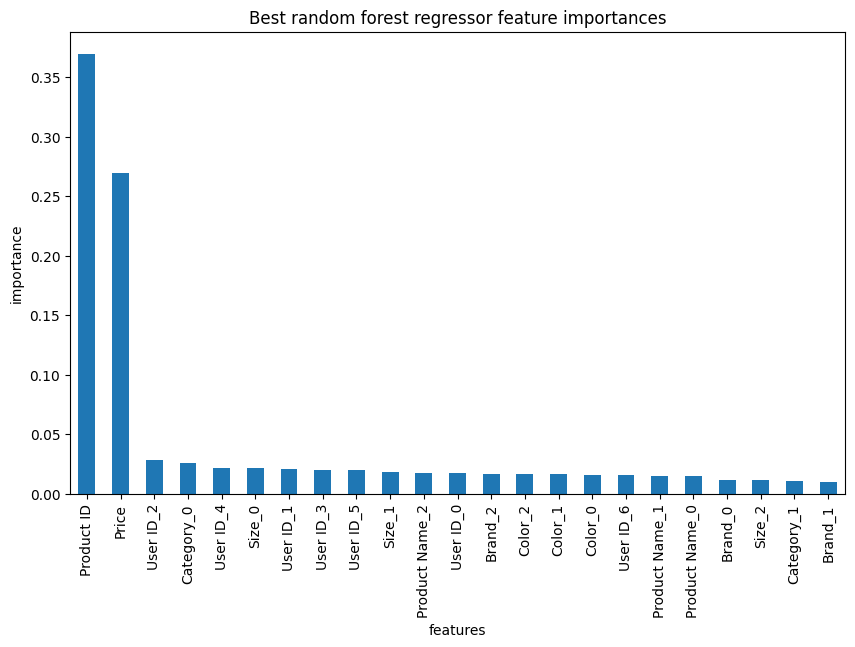

In [31]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Product ID        0.369879
Price             0.269113
User ID_2         0.027837
Category_0        0.025545
User ID_4         0.021729
Size_0            0.021211
User ID_1         0.020306
User ID_3         0.020221
User ID_5         0.019431
Size_1            0.017913
Product Name_2    0.017678
User ID_0         0.017137
Brand_2           0.016499
Color_2           0.016353
Color_1           0.016202
Color_0           0.015757
User ID_6         0.015405
Product Name_1    0.014822
Product Name_0    0.014568
Brand_0           0.011616
dtype: float64


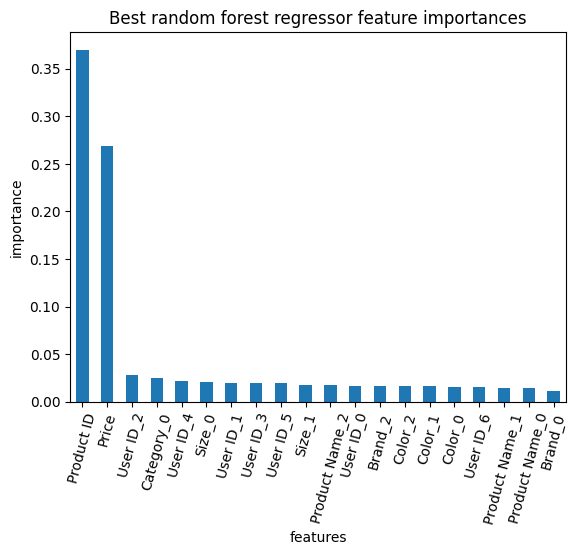

In [32]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xticks(rotation=75)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID_24, User ID_30, User ID_83, Category_Kids Fashion, Size_M, User ID_26, User ID_76, User ID_51 are all top features.

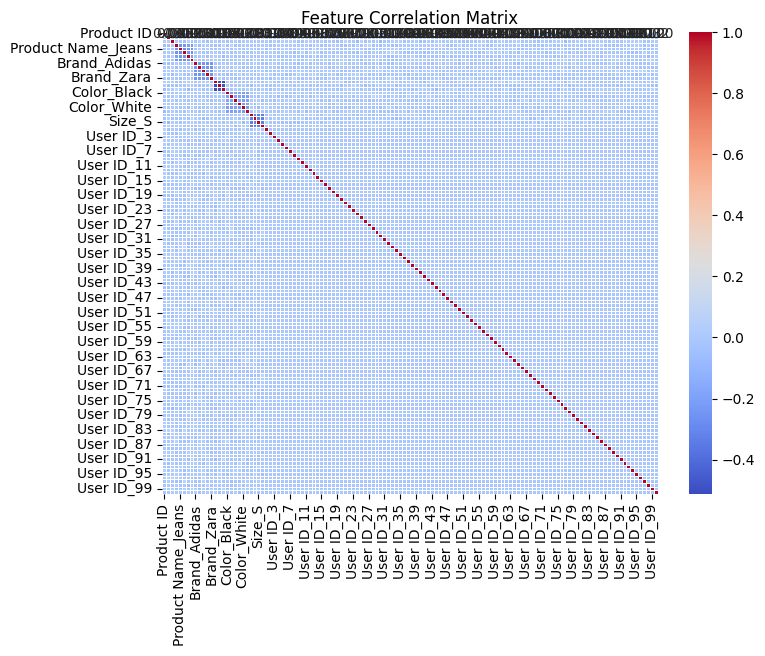

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [34]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.96437403 2.90251204 3.02219527 2.88333464 2.90545041 2.76506863
 3.06673355 2.96637114 2.88354108 3.02004304 3.08668992 3.03125316
 3.07539668 2.80925174 2.99406357 3.01846252 2.99960277 3.02066256
 2.87559236 2.91563105 2.80986574 3.08297317 2.79701736 2.90845595
 2.9712257  2.91851985 2.89487103 3.11853242 2.98196032 2.98654791
 2.88372667 3.01040372 2.96818851 3.08642368 3.03745362 3.09907746
 2.97060917 3.1598798  3.00250449 3.01508398 2.8818991  3.27120238
 2.82470199 3.10379087 3.03364397 2.89046893 2.96393095 3.01910752
 3.40644061 2.91086512 3.08367858 2.76701644 3.0131712  3.08558013
 2.95770027 2.86330979 3.33629412 3.00371538 2.83008366 2.85178038
 3.22325652 3.0791014  2.86557225 2.93126729 2.93800609 3.17726786
 2.84362852 3.11640957 3.00745615 3.08884586 2.96828612 3.00431326
 2.83012384 2.92127127 3.0782489  3.01261195 3.0064475  3.07759389
 3.02842765 2.92266965 2.94531218 2.99862068 2.97719166 2.88837832
 3.23420125 3.02089382 3.11804772 2.89539155 3.06446195 3.0143

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.31
Mean Absolute Error: 0.98
RMSE: 1.1461346692848082
R-squared: -0.02


In [36]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -0.10026965030020163


This is an issue, R square still not significant.

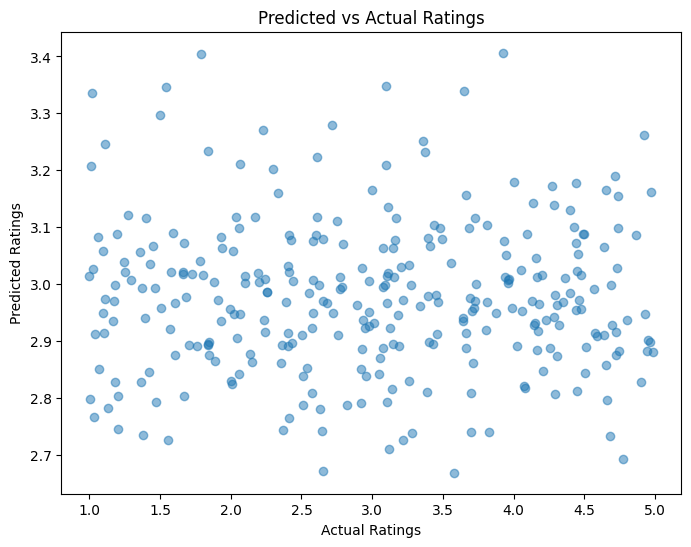

In [37]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Analyzing Predicted Ratings Distribution

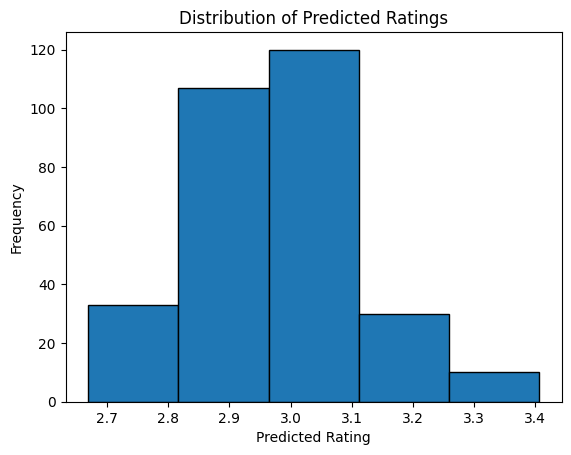

In [38]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [40]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 1.0535243974138095
R-squared: -0.21579060109666903
RMSE: 1.2539970845969493
Mean Squared Error: 1.5725086881776484


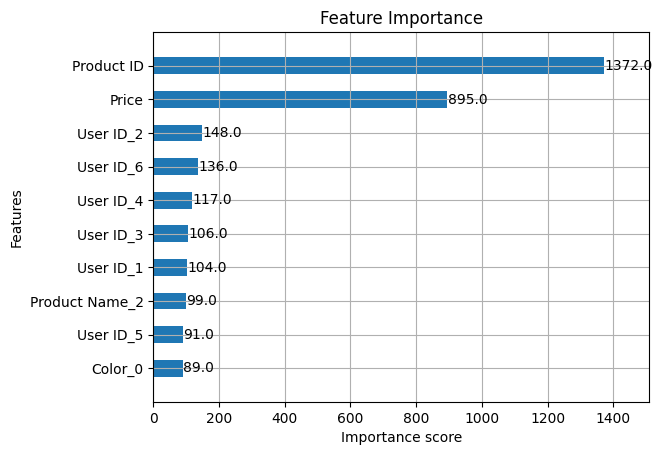

In [41]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Hyperparameter search using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score (Negative MSE): -1.3750393599848767


# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [43]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df.drop(columns=['Rating'])
y = df['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

0:	learn: 1.1271127	total: 124ms	remaining: 2m 4s
200:	learn: 0.2126023	total: 18.8s	remaining: 1m 14s
400:	learn: 0.0408425	total: 34.9s	remaining: 52.2s
600:	learn: 0.0091483	total: 51.4s	remaining: 34.2s
800:	learn: 0.0021246	total: 1m 8s	remaining: 16.9s
999:	learn: 0.0006728	total: 1m 24s	remaining: 0us


array([2.86024265, 3.0135275 , 3.04387003, 2.92618132, 2.79819699,
       2.86710645, 3.10965106, 2.98111996, 3.06530415, 3.16139732,
       3.27274822, 3.04851977, 3.14188895, 3.35205994, 3.33870917,
       3.04545086, 3.43585709, 2.96443852, 2.85800071, 2.86711157,
       2.72899619, 2.88956217, 3.08204445, 3.05157333, 2.71053707,
       2.8968089 , 3.05136956, 3.64117743, 3.05824284, 2.90642078,
       3.26039056, 2.95146014, 2.72783963, 2.95490008, 2.93316141,
       2.62044958, 3.18498137, 2.65395764, 3.28266014, 3.16091055,
       3.3037404 , 3.16088814, 2.72490718, 3.89639684, 2.94226227,
       2.84662578, 3.38390587, 3.18304556, 2.68160178, 3.24335973,
       2.96592967, 3.25694128, 3.24966009, 3.33941739, 3.42499461,
       3.18685015, 3.02528875, 3.16763998, 3.07114365, 2.89732835,
       3.02578454, 3.07874867, 3.15623594, 3.26141923, 3.08982408,
       2.95077634, 2.86712751, 3.24885546, 3.13362751, 2.94790858,
       2.84611375, 2.49433753, 3.03180613, 3.32940359, 2.80908

In [44]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.5307041383006932


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.0763199744283769


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [46]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse = mean_squared_error(y_test, y_pred_cat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (MAE): 1.0744127080609798
R-squared: -0.0005632935683768103
RMSE: 1.2372162859826463
Mean Squared Error: 1.5307041383006932


In [47]:
# Get feature importance
feature_importance = model_cat.get_feature_importance()

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


        Feature  Importance
6         Color   16.397684
4      Category   16.279553
7          Size   14.774949
2  Product Name   14.630567
3         Brand   14.531810
0       User ID    8.449368
1    Product ID    7.830425
5         Price    7.105646


# Visualize Feature Importance

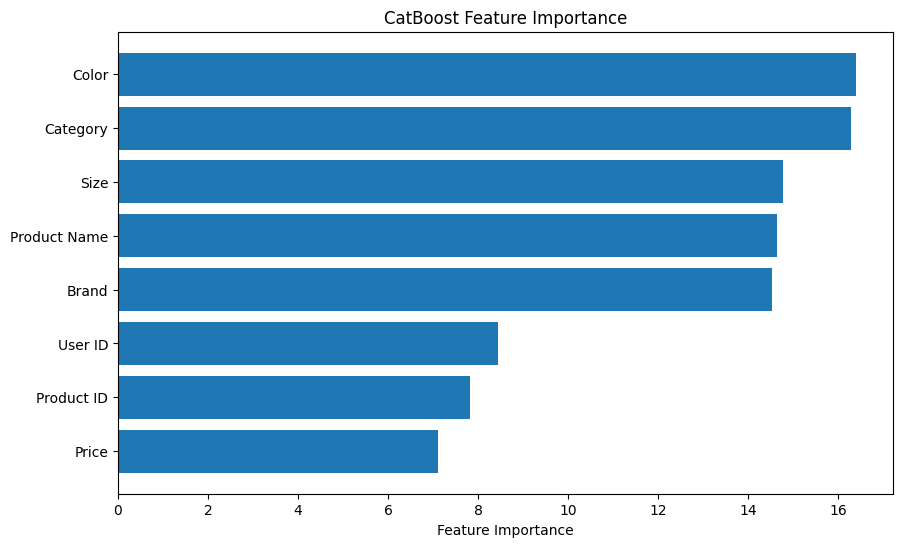

In [48]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Hyperparameter search using GridSearchCV

In [49]:
# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'od_wait': [300],
}

# Grid search
grid_search = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Negate because scoring is negative RMSE
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0:	learn: 1.1405042	total: 145ms	remaining: 1m 12s
200:	learn: 1.0732223	total: 3.32s	remaining: 4.94s
400:	learn: 0.9992266	total: 6.51s	remaining: 1.61s
499:	learn: 0.9690640	total: 8.02s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   9.0s
0:	learn: 1.1305942	total: 8.18ms	remaining: 4.08s
200:	learn: 0.8014701	total: 3.59s	remaining: 5.34s
400:	learn: 0.5475549	total: 7.3s	remaining: 1.8s
499:	learn: 0.4557036	total: 9.36s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  10.5s
0:	learn: 1.1221033	total: 28.7ms	remaining: 14.3s
200:	learn: 0.5425103	total: 4.34s	remaining: 6.45s
400:	learn: 0.2887831	total: 8.54s	remaining: 2.11s
499:	learn: 0.2191075	total: 10.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=

0:	learn: 1.1235582	total: 103ms	remaining: 51.4s
200:	learn: 1.0545240	total: 3.14s	remaining: 4.67s
400:	learn: 0.9938254	total: 6.39s	remaining: 1.58s
499:	learn: 0.9622234	total: 7.92s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   8.7s
0:	learn: 1.1216241	total: 18.6ms	remaining: 9.28s
200:	learn: 0.8068742	total: 3.53s	remaining: 5.25s
400:	learn: 0.5818440	total: 7.24s	remaining: 1.79s
499:	learn: 0.5088196	total: 9.07s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  10.0s
0:	learn: 1.1428459	total: 26.7ms	remaining: 13.3s
200:	learn: 0.8225464	total: 3.57s	remaining: 5.31s
400:	learn: 0.5675736	total: 8.13s	remaining: 2.01s
499:	learn: 0.4709658	total: 10.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  11.4s
0:	learn

0:	learn: 1.1254187	total: 90.5ms	remaining: 45.1s
200:	learn: 1.0480554	total: 3.05s	remaining: 4.54s
400:	learn: 0.9854929	total: 6.04s	remaining: 1.49s
499:	learn: 0.9541859	total: 7.64s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   8.6s
0:	learn: 1.1448082	total: 19.6ms	remaining: 9.77s
200:	learn: 1.0752157	total: 3.22s	remaining: 4.79s
400:	learn: 1.0144843	total: 6.07s	remaining: 1.5s
499:	learn: 0.9828743	total: 7.82s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   8.9s
0:	learn: 1.1391186	total: 23.1ms	remaining: 11.5s
200:	learn: 0.7865777	total: 3.52s	remaining: 5.24s
400:	learn: 0.5319973	total: 8.3s	remaining: 2.05s
499:	learn: 0.4492881	total: 10.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  11.6s
0:	learn:

0:	learn: 1.1317697	total: 203ms	remaining: 1m 41s
200:	learn: 1.0640026	total: 3.37s	remaining: 5.01s
400:	learn: 0.9936040	total: 6.44s	remaining: 1.59s
499:	learn: 0.9615579	total: 7.88s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   8.9s
0:	learn: 1.1239180	total: 6.21ms	remaining: 3.1s
200:	learn: 0.7823955	total: 3.52s	remaining: 5.24s
400:	learn: 0.5288974	total: 7.36s	remaining: 1.82s
499:	learn: 0.4434263	total: 9.43s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  10.5s
0:	learn: 1.1192794	total: 8.99ms	remaining: 4.49s
200:	learn: 0.5725475	total: 4.01s	remaining: 5.96s
400:	learn: 0.3160020	total: 8.27s	remaining: 2.04s
499:	learn: 0.2418187	total: 10.2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  11.6s
0:	learn:

400:	learn: 0.0513320	total: 20.9s	remaining: 5.17s
499:	learn: 0.0272063	total: 26.7s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  28.0s
0:	learn: 1.1250531	total: 65.5ms	remaining: 32.7s
200:	learn: 1.0329761	total: 7.48s	remaining: 11.1s
400:	learn: 0.9386628	total: 15.2s	remaining: 3.75s
499:	learn: 0.8946767	total: 19.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  20.4s
0:	learn: 1.1207535	total: 64.8ms	remaining: 32.3s
200:	learn: 0.6833574	total: 9.39s	remaining: 14s
400:	learn: 0.4213069	total: 19.8s	remaining: 4.88s
499:	learn: 0.3274034	total: 25.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  26.2s
0:	learn: 1.1422505	total: 44.2ms	remaining: 22.1s
200:	learn: 0.7152499	total: 9.28s	remaining: 13.8s
400:	learn

0:	learn: 1.1351721	total: 45.3ms	remaining: 22.6s
200:	learn: 0.2546135	total: 10.7s	remaining: 15.9s
400:	learn: 0.0595911	total: 22.2s	remaining: 5.48s
499:	learn: 0.0331751	total: 27.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  29.1s
0:	learn: 1.1405300	total: 46.2ms	remaining: 23.1s
200:	learn: 1.0351519	total: 8.26s	remaining: 12.3s
400:	learn: 0.9360357	total: 16.1s	remaining: 3.97s
499:	learn: 0.8880487	total: 20.7s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  22.1s
0:	learn: 1.1309602	total: 42.9ms	remaining: 21.4s
200:	learn: 0.6700623	total: 9.28s	remaining: 13.8s
400:	learn: 0.3880042	total: 20.2s	remaining: 4.99s
499:	learn: 0.2986689	total: 25.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  26.9s
0:	learn

400:	learn: 0.9534389	total: 15.4s	remaining: 3.81s
499:	learn: 0.9117932	total: 19.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  20.7s
0:	learn: 1.1446895	total: 63.8ms	remaining: 31.8s
200:	learn: 1.0528851	total: 8.3s	remaining: 12.4s
400:	learn: 0.9556835	total: 16.6s	remaining: 4.09s
499:	learn: 0.9120634	total: 21s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  22.3s
0:	learn: 1.1392425	total: 72.6ms	remaining: 36.2s
200:	learn: 0.6646939	total: 9.4s	remaining: 14s
400:	learn: 0.3744154	total: 20.5s	remaining: 5.06s
499:	learn: 0.2877011	total: 26s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  27.4s
0:	learn: 1.1298806	total: 36.4ms	remaining: 18.2s
200:	learn: 0.3818485	total: 10.4s	remaining: 15.4s
400:	learn: 0.1

499:	learn: 0.0276202	total: 27.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  29.0s
0:	learn: 1.1318448	total: 45.3ms	remaining: 22.6s
200:	learn: 1.0349120	total: 8.1s	remaining: 12.1s
400:	learn: 0.9435812	total: 16.1s	remaining: 3.96s
499:	learn: 0.8977764	total: 20.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  21.3s
0:	learn: 1.1220972	total: 61.8ms	remaining: 30.8s
200:	learn: 0.6326045	total: 9.82s	remaining: 14.6s
400:	learn: 0.3721197	total: 20.9s	remaining: 5.17s
499:	learn: 0.2896733	total: 26.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  27.7s
0:	learn: 1.1175306	total: 69.7ms	remaining: 34.8s
200:	learn: 0.3913533	total: 10.4s	remaining: 15.4s
400:	learn: 0.1459756	total: 21.1s	remaining: 5.21s
499:	lear

200:	learn: 0.4785218	total: 25s	remaining: 37.2s
400:	learn: 0.1837811	total: 54.4s	remaining: 13.4s
499:	learn: 0.1128819	total: 1m 9s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.2min
0:	learn: 1.1130078	total: 230ms	remaining: 1m 54s
200:	learn: 0.1479096	total: 27.6s	remaining: 41s
400:	learn: 0.0229435	total: 57s	remaining: 14.1s
499:	learn: 0.0098868	total: 1m 11s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.2min
0:	learn: 1.1237163	total: 50.1ms	remaining: 25s
200:	learn: 1.0191351	total: 18.7s	remaining: 27.8s
400:	learn: 0.9094891	total: 41.4s	remaining: 10.2s
499:	learn: 0.8606144	total: 51.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  52.9s
0:	learn: 1.1452773	total: 1.28ms	remaining: 641ms
200:	learn: 

499:	learn: 0.0160113	total: 1m 12s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.2min
0:	learn: 1.1355316	total: 162ms	remaining: 1m 20s
200:	learn: 0.1866004	total: 28.3s	remaining: 42.1s
400:	learn: 0.0308442	total: 59.4s	remaining: 14.7s
499:	learn: 0.0127794	total: 1m 14s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.3min
0:	learn: 1.1223931	total: 41.9ms	remaining: 20.9s
200:	learn: 0.5909286	total: 24.3s	remaining: 36.2s
400:	learn: 0.2871083	total: 54.2s	remaining: 13.4s
499:	learn: 0.2089272	total: 1m 8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time= 1.2min
0:	learn: 1.1451553	total: 41.9ms	remaining: 20.9s
200:	learn: 0.6303774	total: 24.4s	remaining: 36.4s
400:	learn: 0.2896928	total: 54.3s	remaining: 13.4s
499:

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.2min
0:	learn: 1.1248712	total: 144ms	remaining: 1m 11s
200:	learn: 1.0125238	total: 19s	remaining: 28.3s
400:	learn: 0.9161570	total: 38.4s	remaining: 9.48s
499:	learn: 0.8596641	total: 50s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  51.7s
0:	learn: 1.1406838	total: 58.8ms	remaining: 29.3s
200:	learn: 1.0296985	total: 20.1s	remaining: 29.9s
400:	learn: 0.9172523	total: 40.6s	remaining: 10s
499:	learn: 0.8618439	total: 52.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  54.3s
0:	learn: 1.1312051	total: 62.3ms	remaining: 31.1s
200:	learn: 0.6186371	total: 23s	remaining: 34.2s
400:	learn: 0.3218797	total: 51.5s	remaining: 12.7s
499:	learn: 0.2263378	total: 1m 5s	remaining: 0us
[CV] END bagg

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.2min
0:	learn: 1.1337565	total: 208ms	remaining: 1m 43s
200:	learn: 0.1618483	total: 27.1s	remaining: 40.3s
400:	learn: 0.0245084	total: 56.6s	remaining: 14s
499:	learn: 0.0100348	total: 1m 11s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.2min
0:	learn: 1.1318945	total: 54.4ms	remaining: 27.1s
200:	learn: 1.0244760	total: 20.6s	remaining: 30.6s
400:	learn: 0.9190395	total: 39.6s	remaining: 9.78s
499:	learn: 0.8672603	total: 51.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  52.9s
0:	learn: 1.1211890	total: 215ms	remaining: 1m 47s
200:	learn: 0.5772863	total: 24.2s	remaining: 36s
400:	learn: 0.2582646	total: 53.8s	remaining: 13.3s
499:	learn: 0.1800470	total: 1m 8s	remaining: 0us
[CV] END

0:	learn: 1.1310598	total: 13.7ms	remaining: 6.83s
200:	learn: 0.8948190	total: 3.94s	remaining: 5.86s
400:	learn: 0.6812182	total: 8.33s	remaining: 2.06s
499:	learn: 0.5890025	total: 10.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  11.5s
0:	learn: 1.1209461	total: 7.07ms	remaining: 3.53s
200:	learn: 0.6790216	total: 4.46s	remaining: 6.63s
400:	learn: 0.4510957	total: 9.33s	remaining: 2.3s
499:	learn: 0.3633616	total: 11.3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.6s
0:	learn: 1.1386473	total: 7.15ms	remaining: 3.57s
200:	learn: 0.6818061	total: 4.21s	remaining: 6.26s
400:	learn: 0.4229063	total: 8.7s	remaining: 2.15s
499:	learn: 0.3340154	total: 10.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.3s
0:	learn: 1

200:	learn: 0.8907668	total: 3.82s	remaining: 5.68s
400:	learn: 0.6741808	total: 8.34s	remaining: 2.06s
499:	learn: 0.5858393	total: 10.6s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  11.7s
0:	learn: 1.1300792	total: 8.9ms	remaining: 4.44s
200:	learn: 0.6606031	total: 4.58s	remaining: 6.81s
400:	learn: 0.3901170	total: 8.8s	remaining: 2.17s
499:	learn: 0.3155674	total: 10.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.4s
0:	learn: 1.1254434	total: 7.42ms	remaining: 3.7s
200:	learn: 1.0822209	total: 2.81s	remaining: 4.18s
400:	learn: 1.0360763	total: 5.99s	remaining: 1.48s
499:	learn: 1.0141038	total: 7.66s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=   8.8s
0:	learn: 1.1452773	total: 2.77ms	remaining: 1.38s
200:	learn:

200:	learn: 0.7516260	total: 4.09s	remaining: 6.08s
400:	learn: 0.4682827	total: 8.59s	remaining: 2.12s
499:	learn: 0.3818013	total: 10.7s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  12.2s
0:	learn: 1.1405042	total: 28.1ms	remaining: 28.1s
200:	learn: 1.0732223	total: 3.56s	remaining: 14.2s
400:	learn: 0.9992266	total: 7.35s	remaining: 11s
600:	learn: 0.9325026	total: 11.4s	remaining: 7.55s
800:	learn: 0.8598680	total: 15.6s	remaining: 3.88s
999:	learn: 0.7924024	total: 20.3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  22.5s
0:	learn: 1.1305942	total: 38.8ms	remaining: 38.8s
200:	learn: 0.8014701	total: 3.89s	remaining: 15.5s
400:	learn: 0.5475549	total: 8.25s	remaining: 12.3s
600:	learn: 0.3908349	total: 12.7s	remaining: 8.41s
800:	learn: 0.2836265	total: 17.3s	remaining: 4.31s
999:	learn: 0.2113773	total:

[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  24.5s
0:	learn: 1.1404807	total: 7.24ms	remaining: 7.24s
200:	learn: 0.5450113	total: 4.23s	remaining: 16.8s
400:	learn: 0.2755285	total: 8.79s	remaining: 13.1s
600:	learn: 0.1577568	total: 13.4s	remaining: 8.9s
800:	learn: 0.0923672	total: 17.8s	remaining: 4.43s
999:	learn: 0.0571530	total: 22.4s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  24.7s
0:	learn: 1.1406305	total: 15.8ms	remaining: 15.8s
200:	learn: 1.0866215	total: 3.42s	remaining: 13.6s
400:	learn: 1.0349729	total: 6.95s	remaining: 10.4s
600:	learn: 0.9808976	total: 10.7s	remaining: 7.11s
800:	learn: 0.9223658	total: 15.1s	remaining: 3.74s
999:	learn: 0.8657898	total: 19.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  21.5s
0:	l

499:	learn: 0.4191631	total: 28.6s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  29.5s
0:	learn: 1.1451553	total: 6.29ms	remaining: 3.14s
200:	learn: 0.8065200	total: 10.4s	remaining: 15.5s
400:	learn: 0.4965777	total: 23.1s	remaining: 5.69s
499:	learn: 0.3946069	total: 29s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  30.4s
0:	learn: 1.1391630	total: 74.9ms	remaining: 37.4s
200:	learn: 0.5182910	total: 11.2s	remaining: 16.7s
400:	learn: 0.2366586	total: 23.7s	remaining: 5.84s
499:	learn: 0.1552369	total: 29.7s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  30.9s
0:	learn: 1.1317240	total: 85.8ms	remaining: 1m 25s
200:	learn: 0.9920443	total: 9.25s	remaining: 36.8s
400:	learn: 0.8619038	total: 19.1s	remaining: 28.6s
600:	lear

0:	learn: 1.1452773	total: 1.72ms	remaining: 859ms
200:	learn: 1.0663137	total: 9.25s	remaining: 13.8s
400:	learn: 0.9953098	total: 18.1s	remaining: 4.47s
499:	learn: 0.9564009	total: 22.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  24.2s
0:	learn: 1.1400006	total: 74.4ms	remaining: 37.1s
200:	learn: 0.7625782	total: 9.79s	remaining: 14.6s
400:	learn: 0.4706086	total: 22.2s	remaining: 5.48s
499:	learn: 0.3743341	total: 28.3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  29.6s
0:	learn: 1.1303620	total: 78ms	remaining: 38.9s
200:	learn: 0.5162990	total: 11.3s	remaining: 16.8s
400:	learn: 0.2320740	total: 23.6s	remaining: 5.82s
499:	learn: 0.1571394	total: 29.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  31.3s
0:	learn: 

[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1176200	total: 77.6ms	remaining: 1m 17s
200:	learn: 0.2170386	total: 12s	remaining: 47.6s
400:	learn: 0.0454241	total: 24.5s	remaining: 36.7s
600:	learn: 0.0132892	total: 36.8s	remaining: 24.5s
800:	learn: 0.0042261	total: 48.6s	remaining: 12.1s
999:	learn: 0.0012721	total: 1m	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1233848	total: 68.5ms	remaining: 1m 8s
200:	learn: 1.0358952	total: 8.67s	remaining: 34.5s
400:	learn: 0.9534389	total: 17.7s	remaining: 26.5s
600:	learn: 0.8701641	total: 27.8s	remaining: 18.5s
800:	learn: 0.7739730	total: 40s	remaining: 9.94s
999:	learn: 0.6909299	total: 52.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  54.6s
0:	learn

600:	learn: 0.2505772	total: 34.2s	remaining: 22.7s
800:	learn: 0.1479115	total: 46.5s	remaining: 11.6s
999:	learn: 0.0908427	total: 58.7s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1422505	total: 64.5ms	remaining: 1m 4s
200:	learn: 0.7152499	total: 10.3s	remaining: 40.8s
400:	learn: 0.4032273	total: 22.6s	remaining: 33.8s
600:	learn: 0.2339009	total: 34.9s	remaining: 23.2s
800:	learn: 0.1443502	total: 47.6s	remaining: 11.8s
999:	learn: 0.0914905	total: 60s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1376745	total: 59.8ms	remaining: 59.8s
200:	learn: 0.3521324	total: 11.9s	remaining: 47.3s
400:	learn: 0.1323477	total: 23.9s	remaining: 35.7s
600:	learn: 0.0496818	total: 36s	remaining: 23.9s
800:	learn: 0.0209522	total: 48.1s	remaining: 11.9s
999:	learn: 0.0086167	total:

200:	learn: 0.8795093	total: 23.3s	remaining: 1m 32s
400:	learn: 0.6735352	total: 48.5s	remaining: 1m 12s
600:	learn: 0.4973320	total: 1m 15s	remaining: 50.3s
800:	learn: 0.3477403	total: 1m 46s	remaining: 26.5s
999:	learn: 0.2466990	total: 2m 17s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 2.3min
0:	learn: 1.1150607	total: 194ms	remaining: 3m 13s
200:	learn: 0.2752656	total: 27.6s	remaining: 1m 49s
400:	learn: 0.0628389	total: 58.5s	remaining: 1m 27s
600:	learn: 0.0187804	total: 1m 29s	remaining: 59.5s
800:	learn: 0.0051954	total: 2m	remaining: 29.9s
999:	learn: 0.0015204	total: 2m 31s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 2.6min
0:	learn: 1.1349641	total: 152ms	remaining: 2m 32s
200:	learn: 0.2677613	total: 27.3s	remaining: 1m 48s
400:	learn: 0.0599249	total: 58.6s	remaining: 1m 27s
600:	learn: 0.

600:	learn: 0.5248556	total: 1m 13s	remaining: 49.1s
800:	learn: 0.3842152	total: 1m 44s	remaining: 25.9s
999:	learn: 0.2780706	total: 2m 14s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 2.3min
0:	learn: 1.1432175	total: 204ms	remaining: 3m 24s
200:	learn: 0.9093843	total: 23.4s	remaining: 1m 33s
400:	learn: 0.6966278	total: 49.3s	remaining: 1m 13s
600:	learn: 0.5328162	total: 1m 14s	remaining: 49.4s
800:	learn: 0.3786183	total: 1m 46s	remaining: 26.5s
999:	learn: 0.2643462	total: 2m 18s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 2.4min
0:	learn: 1.1353774	total: 170ms	remaining: 2m 49s
200:	learn: 0.2746794	total: 26.3s	remaining: 1m 44s
400:	learn: 0.0583654	total: 57.7s	remaining: 1m 26s
600:	learn: 0.0130317	total: 1m 28s	remaining: 59s
800:	learn: 0.0036711	total: 2m	remaining: 29.8s
999:	learn: 0.00

[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time= 2.2min
0:	learn: 1.1401287	total: 126ms	remaining: 2m 6s
200:	learn: 0.9798181	total: 24.5s	remaining: 1m 37s
400:	learn: 0.8478738	total: 45.7s	remaining: 1m 8s
600:	learn: 0.6935326	total: 1m 12s	remaining: 48.2s
800:	learn: 0.5595046	total: 1m 43s	remaining: 25.8s
999:	learn: 0.4606739	total: 2m 15s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time= 2.3min
0:	learn: 1.1309602	total: 79.8ms	remaining: 1m 19s
200:	learn: 0.4785218	total: 26.1s	remaining: 1m 43s
400:	learn: 0.1837811	total: 56.6s	remaining: 1m 24s
600:	learn: 0.0697539	total: 1m 28s	remaining: 58.6s
800:	learn: 0.0311183	total: 1m 59s	remaining: 29.7s
999:	learn: 0.0147216	total: 2m 29s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total ti

600:	learn: 0.8026665	total: 1m 3s	remaining: 41.9s
800:	learn: 0.6875544	total: 1m 31s	remaining: 22.8s
999:	learn: 0.5890887	total: 2m	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time= 2.1min
0:	learn: 1.1406838	total: 62.3ms	remaining: 1m 2s
200:	learn: 1.0296985	total: 19.6s	remaining: 1m 17s
400:	learn: 0.9172523	total: 39.8s	remaining: 59.4s
600:	learn: 0.8063206	total: 1m 3s	remaining: 42s
800:	learn: 0.6913010	total: 1m 29s	remaining: 22.3s
999:	learn: 0.5933829	total: 1m 57s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time= 2.0min
0:	learn: 1.1312051	total: 80.3ms	remaining: 1m 20s
200:	learn: 0.6186371	total: 21.8s	remaining: 1m 26s
400:	learn: 0.3218797	total: 48.9s	remaining: 1m 13s
600:	learn: 0.1557106	total: 1m 16s	remaining: 50.5s
800:	learn: 0.0742955	total: 1m 43s	remaining: 25.8s
999:	learn: 0.0348

[CV] END bagging_temperature=1.0, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  13.8s
0:	learn: 1.1235582	total: 9.04ms	remaining: 9.04s
200:	learn: 1.0545240	total: 4.09s	remaining: 16.3s
400:	learn: 0.9938254	total: 8.64s	remaining: 12.9s
600:	learn: 0.9299296	total: 13s	remaining: 8.62s
800:	learn: 0.8641171	total: 17.6s	remaining: 4.37s
999:	learn: 0.7982965	total: 22.8s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  24.6s
0:	learn: 1.1448082	total: 8.66ms	remaining: 8.65s
200:	learn: 1.0752157	total: 4.15s	remaining: 16.5s
400:	learn: 1.0144843	total: 8.16s	remaining: 12.2s
600:	learn: 0.9465629	total: 12.8s	remaining: 8.51s
800:	learn: 0.8737023	total: 17.9s	remaining: 4.44s
999:	learn: 0.8114200	total: 23.1s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  25.2s
0:	le

0:	learn: 1.1237327	total: 35.3ms	remaining: 35.3s
200:	learn: 1.0727496	total: 3.63s	remaining: 14.4s
400:	learn: 1.0237544	total: 7.77s	remaining: 11.6s
600:	learn: 0.9737255	total: 12.3s	remaining: 8.15s
800:	learn: 0.9212309	total: 17.1s	remaining: 4.26s
999:	learn: 0.8707459	total: 22.3s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  24.1s
0:	learn: 1.1406305	total: 32.4ms	remaining: 32.4s
200:	learn: 1.0866215	total: 3.83s	remaining: 15.2s
400:	learn: 1.0349729	total: 7.96s	remaining: 11.9s
600:	learn: 0.9808976	total: 12.3s	remaining: 8.19s
800:	learn: 0.9223658	total: 17.6s	remaining: 4.37s
999:	learn: 0.8657898	total: 22.4s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  24.7s
0:	learn: 1.1310598	total: 10ms	remaining: 10s
200:	learn: 0.8948190	total: 4.16s	remaining: 16.5s
400:	learn: 0.6812182	total: 

[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  28.2s
0:	learn: 1.1404807	total: 48.9ms	remaining: 48.8s
200:	learn: 0.5450113	total: 5.12s	remaining: 20.3s
400:	learn: 0.2755285	total: 10.4s	remaining: 15.5s
600:	learn: 0.1577568	total: 15.6s	remaining: 10.3s
800:	learn: 0.0923672	total: 20.6s	remaining: 5.12s
999:	learn: 0.0571530	total: 26s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  28.7s
0:	learn: 1.1449240	total: 41.1ms	remaining: 41.1s
200:	learn: 1.0925735	total: 4.05s	remaining: 16.1s
400:	learn: 1.0467294	total: 8.15s	remaining: 12.2s
600:	learn: 0.9956034	total: 12.9s	remaining: 8.57s
800:	learn: 0.9430383	total: 17.8s	remaining: 4.42s
999:	learn: 0.8909666	total: 23.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  25.4s
0:	le

600:	learn: 0.3999973	total: 15s	remaining: 22.4s
800:	learn: 0.2994864	total: 20.3s	remaining: 17.7s
1000:	learn: 0.2251078	total: 25.2s	remaining: 12.6s
1200:	learn: 0.1720484	total: 30.5s	remaining: 7.59s
1400:	learn: 0.1260148	total: 35.5s	remaining: 2.51s
1499:	learn: 0.1104548	total: 38.1s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  41.7s
0:	learn: 1.1374387	total: 42.3ms	remaining: 1m 3s
200:	learn: 0.5528463	total: 4.72s	remaining: 30.5s
400:	learn: 0.2891349	total: 9.85s	remaining: 27s
600:	learn: 0.1639139	total: 15.1s	remaining: 22.5s
800:	learn: 0.0965616	total: 20.3s	remaining: 17.7s
1000:	learn: 0.0580007	total: 25.5s	remaining: 12.7s
1200:	learn: 0.0349391	total: 30.6s	remaining: 7.61s
1400:	learn: 0.0220589	total: 35.6s	remaining: 2.52s
1499:	learn: 0.0177774	total: 38.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1500, l2_leaf_reg=1, learning_rate=0.1, 

600:	learn: 0.1140889	total: 35.4s	remaining: 23.5s
800:	learn: 0.0595296	total: 48.1s	remaining: 11.9s
999:	learn: 0.0311730	total: 1m	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1343564	total: 99ms	remaining: 1m 38s
200:	learn: 0.2259973	total: 11.8s	remaining: 46.8s
400:	learn: 0.0492582	total: 23.9s	remaining: 35.7s
600:	learn: 0.0147237	total: 35.6s	remaining: 23.7s
800:	learn: 0.0048115	total: 47.7s	remaining: 11.9s
999:	learn: 0.0017156	total: 60s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time= 1.0min
0:	learn: 1.1318448	total: 44.9ms	remaining: 44.9s
200:	learn: 1.0349120	total: 9.32s	remaining: 37.1s
400:	learn: 0.9435812	total: 18.8s	remaining: 28.1s
600:	learn: 0.8501565	total: 28.8s	remaining: 19.1s
800:	learn: 0.7573662	total: 40.2s	remaining: 9.98s
999:	learn: 0.6787777	total: 51

0:	learn: 1.1331422	total: 35.6ms	remaining: 17.8s
200:	learn: 0.9982840	total: 3.67s	remaining: 5.46s
400:	learn: 0.8604397	total: 6.72s	remaining: 1.66s
499:	learn: 0.7995518	total: 8.58s	remaining: 0us
Best Hyperparameters: {'bagging_temperature': 0.0, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'od_wait': 300}
Best RMSE: 0.01608422863621688


We first Sort out the predicted ratings for each user in descending order and then Select the top N products with the highest predicted ratings.

This gives us the Top-N recommended products for each user based on the predicted ratings.

In [50]:
# Assuming `y_pred` are the predicted ratings and `X_test` contains the user-product pairs
X_test['Predicted Rating'] = y_pred_cat

# Define how many top recommendations per user you want
N = 5  # You can change this value to 5, 10, or any other number

# Sort by user ID and predicted rating to get top N recommendations
top_n_recommendations = X_test.sort_values(by=['User ID', 'Predicted Rating'], ascending=[True, False])

# For each user, get top N recommendations (e.g., top 3)
top_n_recommendations = top_n_recommendations.groupby('User ID').head(N)

print(top_n_recommendations[['User ID', 'Product ID', 'Predicted Rating']])

     User ID  Product ID  Predicted Rating
985        1         986          3.367446
946        1         947          3.268100
963        1         964          3.140486
464        1         465          2.981350
514        1         515          2.814781
..       ...         ...               ...
678       99         679          2.867106
110       99         111          2.844997
165      100         166          2.851344
81       100          82          2.694966
668      100         669          2.576668

[288 rows x 3 columns]


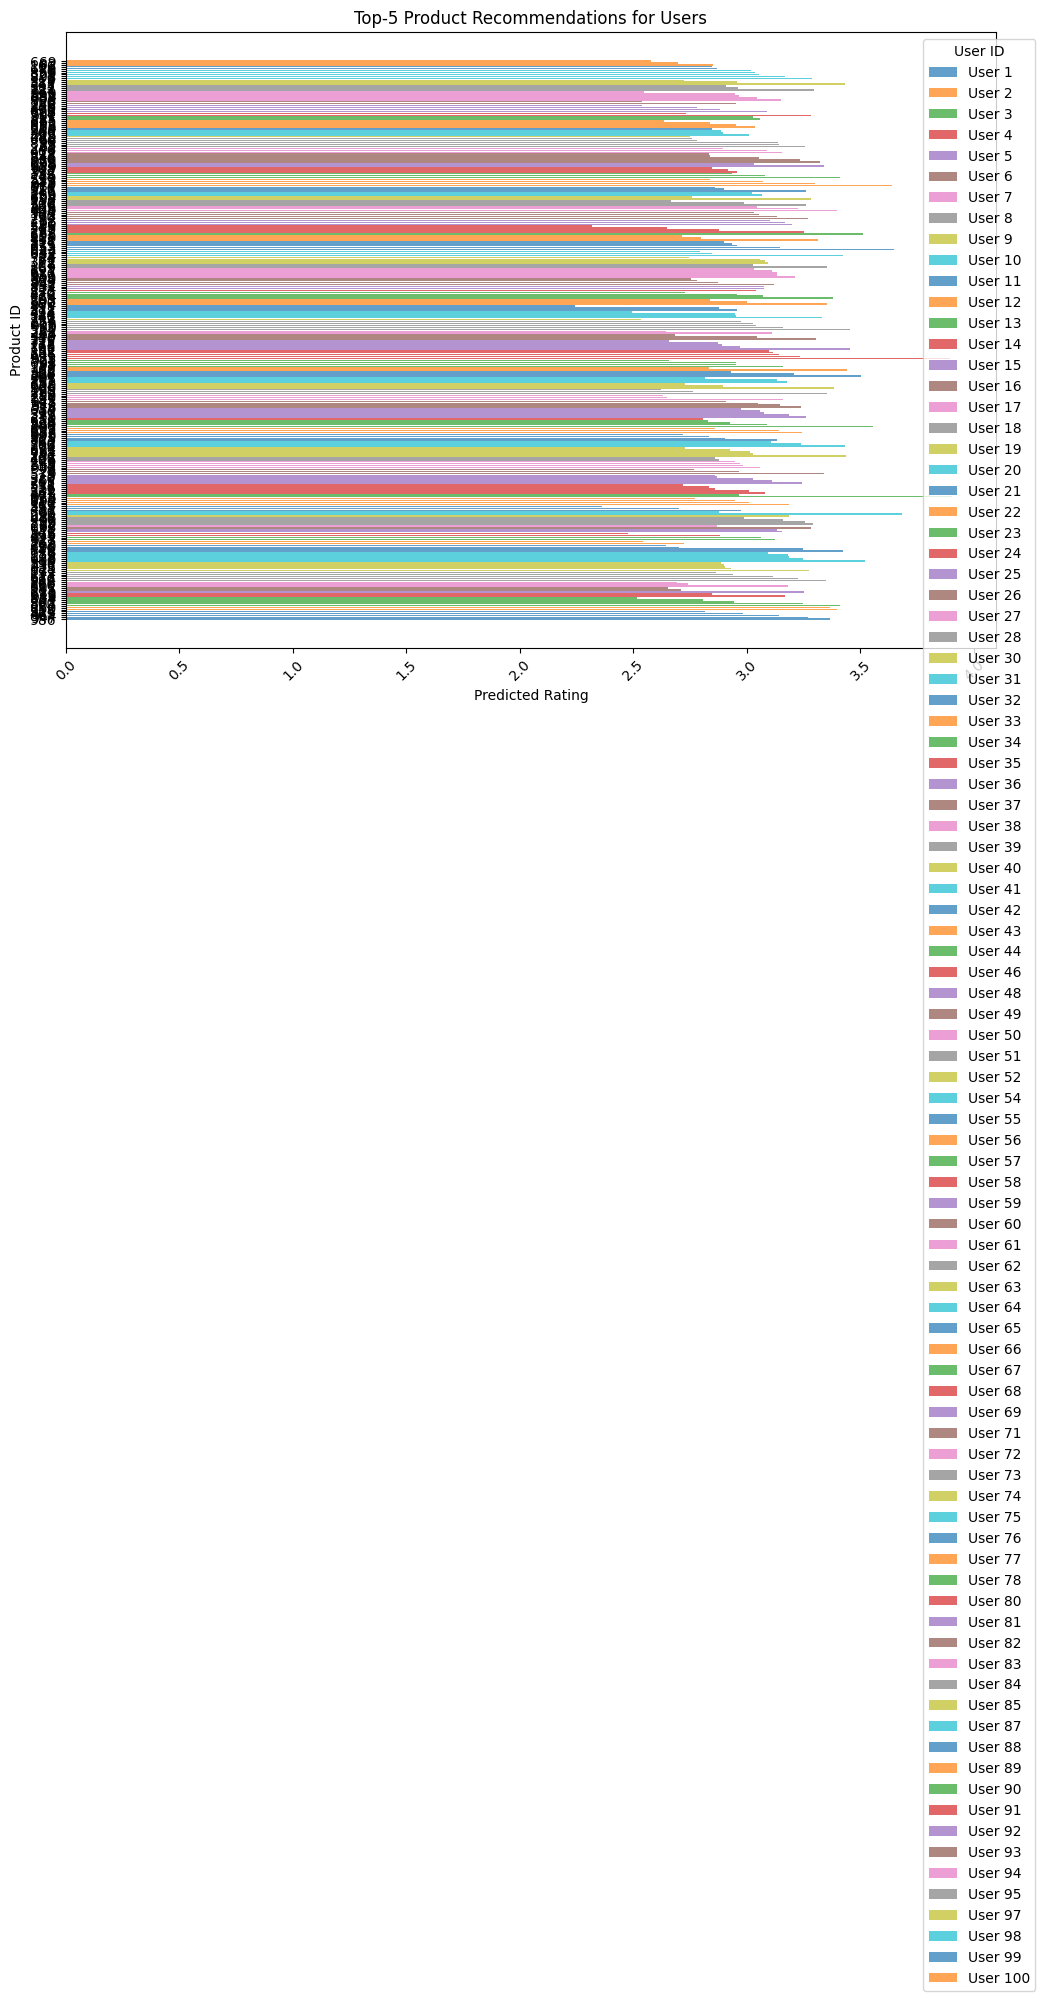

In [51]:
# Plot Top-N Recommendations for each user
plt.figure(figsize=(12, 8))  # Adjusted figure size for top N recommendations

# Iterate over each unique user
for user_id in top_n_recommendations['User ID'].unique():
    user_recommendations = top_n_recommendations[top_n_recommendations['User ID'] == user_id]
    
    # Plot the top N products for this user
    plt.barh(user_recommendations['Product ID'].astype(str), 
             user_recommendations['Predicted Rating'], 
             label=f'User {user_id}', alpha=0.7)

plt.xlabel('Predicted Rating')
plt.ylabel('Product ID')
plt.title(f'Top-{N} Product Recommendations for Users')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='User ID', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # Adjusts the layout to prevent overlap with the legend
plt.show()



# Method 4 - Singular Value Decomposition (SVD)

Here we are using SVD (Singular Value Decomposition) for collaborative filtering-based recommendation, that specifically shows how the User will rate a particular Product.

In [52]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df.pivot(index='User ID', columns='Product ID', values= "Rating")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Product ID  1     2     3     4     5     6     7     8     9     10    ...  \
User ID                                                                 ...   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Product ID  991   992   993   994   995   996   997   998   999   1000  
User ID                                                                 
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       

# Collaborative Filtering Using Matrix Factorization (SVD)

Using Collaborative Filtering that uses user-item interactions (e.g., user ratings for products) to predict how a user might rate an item.

In [53]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1

user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1

recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['User ID', 'Product ID', 'Rating']])

Top 5 Recommended Products:
     User ID  Product ID    Rating
299        3         300  4.923509
290        3         291  4.818010
323        3         324  4.530634
866        3         867  4.235109
269        3         270  4.213088


# Content-based Filtering

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
322         323     95  2.326168
548         549     96  4.283951
560         561     96  3.968456
566         567     96  1.206723
857         858     96  4.451841


In [55]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
299         300     57  4.923509
290         291     64  4.818010
323         324     18  4.530634
866         867     90  4.235109
269         270     60  4.213088
42           43     39  3.601869
75           76     39  2.974139
562         563     39  4.043087
657         658     40  3.252305
695         696     39  4.592767


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.26654985814612564


The RMSE value of 0.2666 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [57]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [58]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [59]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [60]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [61]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [62]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [63]:
df_seg = df_seg.drop(columns = ["Price"])

In [64]:
df_seg.head()

,User ID,Product ID,Product Name,Brand,Category,Rating,Color,Size,total_purchase_amount,spending_segment
0,19,1,Dress,Adidas,Men's Fashion,1.043159,Black,XL,40,Low Spending
1,97,2,Shoes,H&M,Women's Fashion,4.026416,Black,L,82,High Spending
2,25,3,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,44,Low Spending
3,57,4,Shoes,Zara,Men's Fashion,1.049523,White,S,23,Low Spending
4,79,5,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,79,High Spending


# CatBoost Model with spending_segment column

In [65]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df_seg.drop(columns=['Rating'])
y = df_seg['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'spending_segment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost model
model_seg = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_seg.fit(X_train, y_train)

# Make predictions
y_pred_seg = model_seg.predict(X_test)

# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_seg, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


0:	learn: 1.1346041	total: 41.1ms	remaining: 41.1s
200:	learn: 0.2539151	total: 3.75s	remaining: 14.9s
400:	learn: 0.0551810	total: 9.17s	remaining: 13.7s
600:	learn: 0.0164877	total: 12.2s	remaining: 8.07s
800:	learn: 0.0048373	total: 15s	remaining: 3.73s
999:	learn: 0.0016200	total: 17.9s	remaining: 0us


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_seg)
print(f"R-squared: {r2}")

In [ ]:
y_pred_seg

In [ ]:
# Assuming you used CatBoost for training
import shap

# Fit the model (example using CatBoost)
# model.fit(X_train, y_train)

# SHAP (SHapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(model_seg)
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train)

# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [ ]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

feature_importances = model_seg.get_feature_importance()
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [ ]:
# Get feature importance
feature_importances = model_seg.get_feature_importance()

# Get feature names (make sure they match the original features used in the model)
feature_names = X.columns

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # To show the highest importance on top
plt.show()

Summary: 

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating). 